# The Human Activity Recognition database

*The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities performed.*



# Description of experiment
The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKINGUPSTAIRS, WALKINGDOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data. 

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.



### Table of Content

1. **Importing necessary libraries**
2. **Loading data**
3. **Data preprocessing**
    - 3.a Checking for duplicates
    - 3.b Checking for missing values
    - 3.c Checking for class imbalance
4. **Exploratory Data Analysis**
    - 4.a Analysing tBodyAccMag-mean feature
    - 4.b Analysing Angle between X-axis and gravityMean feature
    - 4.c Analysing Angle between Y-axis and gravityMean feature
    - 4.d Visualizing data using PCA
    - 4.e Visualizing data using t-SNE(t-distributed Stochastic Neighbor Embedding)
5. **Model Prediction and Evaluation**
    - 5.a Logistic regression model with Hyperparameter tuning and cross validation
    - 5.b Kernel SVM model with Hyperparameter tuning and cross validation
    - 5.c Decision tree model with Hyperparameter tuning and cross validation
    - 5.d Random forest model with Hyperparameter tuning and cross validation

# <font color='red'>1. Importing Libraries</font><a class = "anchor" id = "import"></a>

In [54]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from collections import Counter

from sklearn.decomposition import PCA#dimension reduction
from sklearn.manifold import TSNE#[t-distributed Stochastic Neighbor Embedding]

from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

# <font color='red'>2. Loading Data</font><a class = "anchor" id = "load"></a>

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [5]:
train['subject'].value_counts()

subject
25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: count, dtype: int64

In [6]:
train['Activity'].value_counts()

Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64

# <font color='red'>3. Data preprocessing</font><a class = "anchor" id = "preP"></a>

##### 3a. Checking for duplicates

In [7]:
print('Number of duplicates data in Train : ',sum(train.duplicated()))
print('Number of duplicates data in Test : ',sum(test.duplicated()))

Number of duplicates data in Train :  0
Number of duplicates data in Test :  0


##### 3b. Checking for missing values

In [8]:
train.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [9]:
print('Total number of missing values in Train : ',train.isna().values.sum())
print('Total number of missing values in Test : ',test.isna().values.sum())

Total number of missing values in Train :  0
Total number of missing values in Test :  0


##### 3c. Checking for class Imbalance

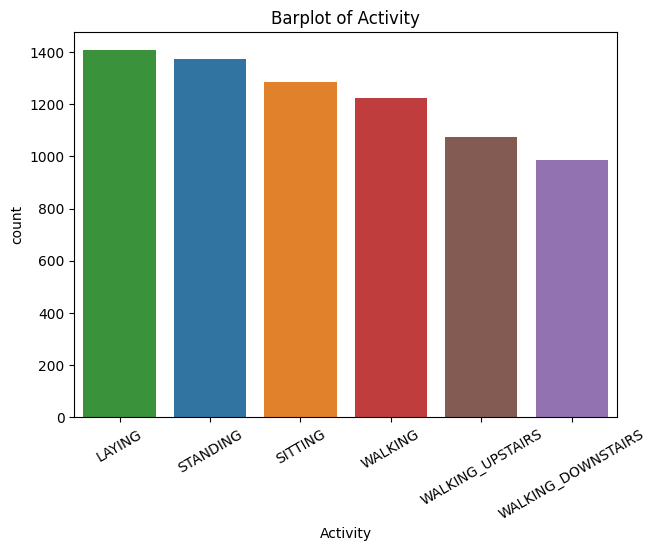

In [10]:
plt.figure(figsize = (7,5) )
sns.countplot(x = train['Activity'],order =train['Activity'].value_counts().index,hue = train['Activity'])
plt.title("Barplot of Activity")
plt.xticks(rotation=30)
plt.show()

Concluded: `There is almost same number of observations across all the six activities so this data not have class imbalance problems`

# <font color='red'>4. Exploratory Data Analysis</font><a class = "anchor" id = "EDA"></a>

what features are there

In [11]:
train.head(1)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.0304,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING


In [12]:
sample_str = 'angle(tBodyAccMean,gravity)'
sample_str.split('-')[0].split('(')[0]

'angle'

In [13]:
l = [col.split('-')[0].split('(')[0] for col in train.columns]

In [14]:
#With orient='index', 
#the dictionary keys become the DataFrame’s index, 
#and the values (if they are scalars or lists) are used as row data.
pd.DataFrame.from_dict(Counter(l),orient= 'index').rename(columns = {0:'count'}).sort_values('count',ascending = False)

,count
fBodyAccJerk,79
fBodyGyro,79
fBodyAcc,79
tBodyAcc,40
tBodyGyro,40
tBodyAccJerk,40
tGravityAcc,40
tBodyGyroJerk,40
tBodyAccJerkMag,13
tGravityAccMag,13


##### 4a. Analysing tBodyAccMag-mean feature<a class = "anchor" id = "4a"></a>

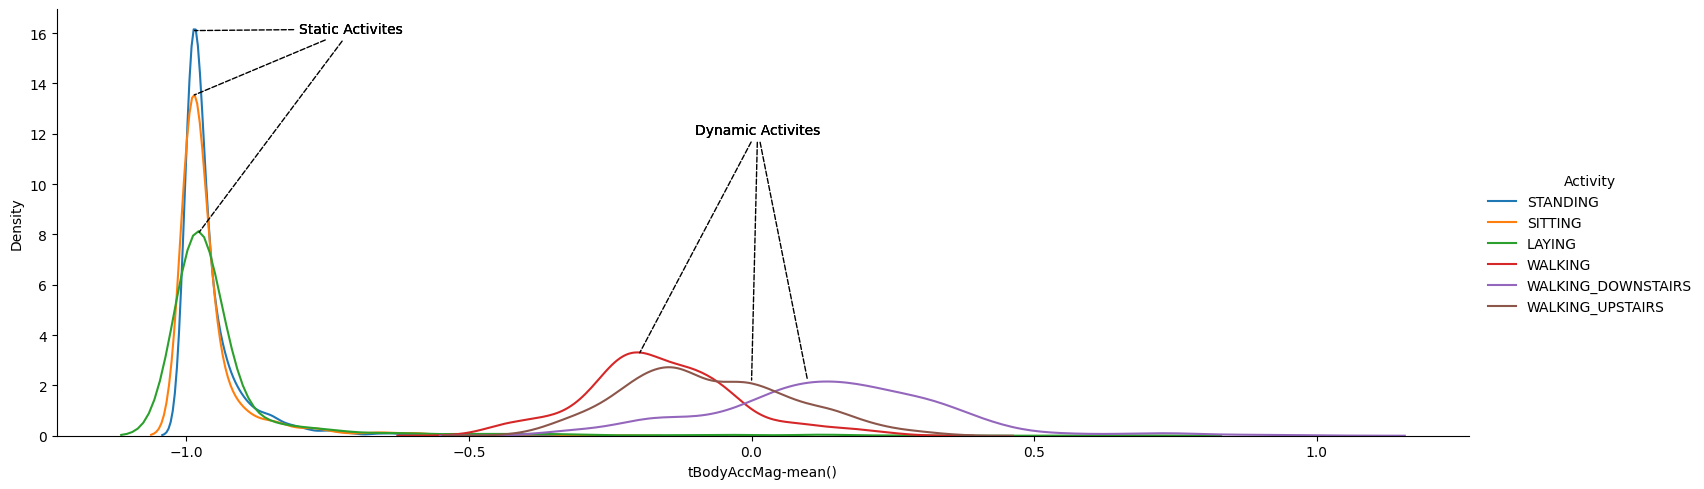

In [15]:
facetgrid = sns.FacetGrid(train,hue='Activity',height= 5 ,aspect = 3)
facetgrid.map(sns.distplot,'tBodyAccMag-mean()' ,hist = False).add_legend()

plt.annotate('Static Activites',xy = (-.98,8),xytext = (-.8,16),arrowprops = {'arrowstyle':'-','ls':'dashed'})
plt.annotate('Static Activites',xy = (-.99,13.5),xytext = (-.8,16),arrowprops = {'arrowstyle':'-','ls':'dashed'})
plt.annotate('Static Activites',xy = (-.99,16.1),xytext = (-.8,16),arrowprops = {'arrowstyle':'-','ls':'dashed'})

plt.annotate('Dynamic Activites',xy = (-.2,3.2),xytext = (-.1,12),arrowprops = {'arrowstyle':'-','ls':'dashed'})
plt.annotate('Dynamic Activites',xy = (-.0,2.1),xytext = (-.1,12),arrowprops = {'arrowstyle':'-','ls':'dashed'})
plt.annotate('Dynamic Activites',xy = (.1,2.1),xytext = (-.1,12),arrowprops = {'arrowstyle':'-','ls':'dashed'})
plt.show()

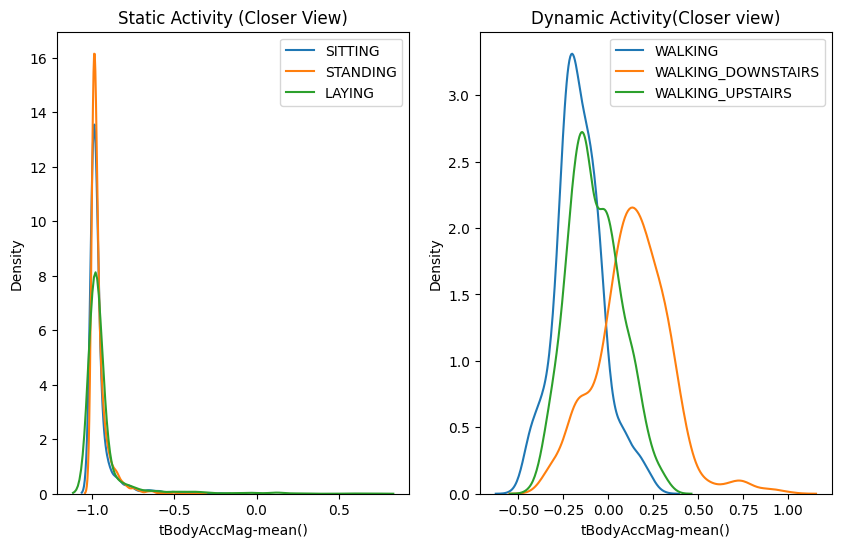

In [16]:
plt.figure(figsize = (10,6))
plt.subplot(121)
plt.title('Static Activity (Closer View)')
sns.distplot(train[train.Activity == 'SITTING']['tBodyAccMag-mean()'],hist = False,label='SITTING')
sns.distplot(train[train.Activity == 'STANDING']['tBodyAccMag-mean()'],hist = False,label='STANDING')
sns.distplot(train[train.Activity == 'LAYING']['tBodyAccMag-mean()'],hist = False,label='LAYING')
#plt.axis([-1.02,-.5,0,35])
plt.legend()
plt.subplot(122)
plt.title('Dynamic Activity(Closer view)')
sns.distplot(train[train.Activity == 'WALKING']['tBodyAccMag-mean()'],hist = False,label='WALKING')
sns.distplot(train[train.Activity == 'WALKING_DOWNSTAIRS']['tBodyAccMag-mean()'],hist = False,label='WALKING_DOWNSTAIRS')
sns.distplot(train[train.Activity == 'WALKING_UPSTAIRS']['tBodyAccMag-mean()'],hist = False,label='WALKING_UPSTAIRS')
plt.legend()
plt.show()

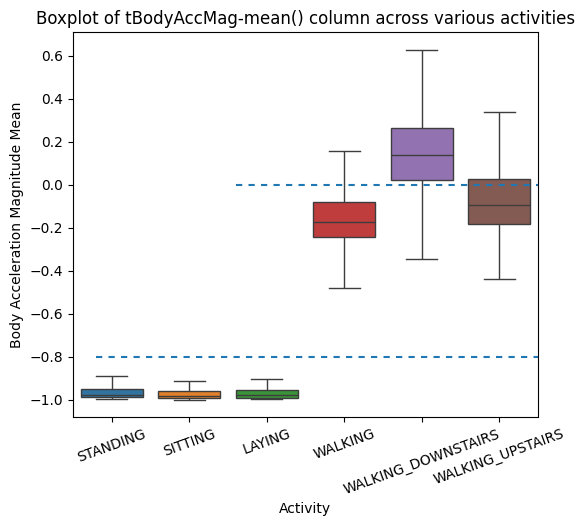

In [17]:
plt.figure(figsize=(6,5))
sns.boxplot(x = 'Activity',y = 'tBodyAccMag-mean()',data = train,hue = 'Activity',showfliers = False)
plt.ylabel('Body Acceleration Magnitude Mean')
plt.title("Boxplot of tBodyAccMag-mean() column across various activities")
plt.axhline(y = -0.8, xmin = 0.05, dashes = (3,3))
plt.axhline(y= 0.0, xmin = 0.35, dashes=(3,3))
plt.xticks(rotation = 20)
plt.show()

Using boxplot again we can come with conditions to seperate static activities from dynamic activities.

``` 
if(tBodyAccMag-mean()<=-0.8):
    Activity = "static"
if(tBodyAccMag-mean()>=-0.6):
    Activity = "dynamic"
``` 

Also, we can easily seperate WALKING_DOWNSTAIRS activity from others using boxplot.

``` 
if(tBodyAccMag-mean()>0.02):
    Activity = "WALKING_DOWNSTAIRS"
else:
    Activity = "others"
```

But still 25% of WALKING_DOWNSTAIRS observations are below 0.02 which are misclassified as **others** so this condition makes an error of 25% in classification.

##### 4b. Analysing Angle between X-Axis and gravityMean feature<a class = "anchor" id = "4b"></a>

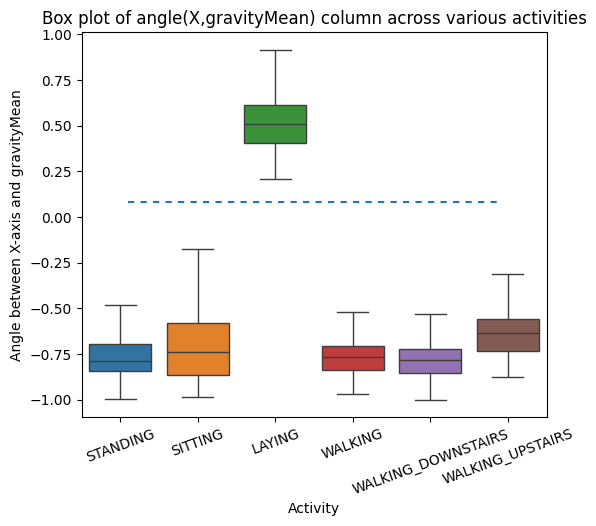

In [18]:
plt.figure(figsize=(6,5))
sns.boxplot(x = 'Activity',y = 'angle(X,gravityMean)',data = train,hue = 'Activity',showfliers = False)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,dashes=(3,3))
plt.ylabel("Angle between X-axis and gravityMean")
plt.title('Box plot of angle(X,gravityMean) column across various activities')
plt.xticks(rotation = 20)
plt.show()

From the boxplot we can observe that angle(X,gravityMean) perfectly seperates LAYING from other activities.
``` 
if(angle(X,gravityMean)>0.01):
    Activity = "LAYING"
else:
    Activity = "others"
```

##### 4c. Analysing Angle between Y-axis and gravityMean feature <a class = "anchor" id = "4c"></a>

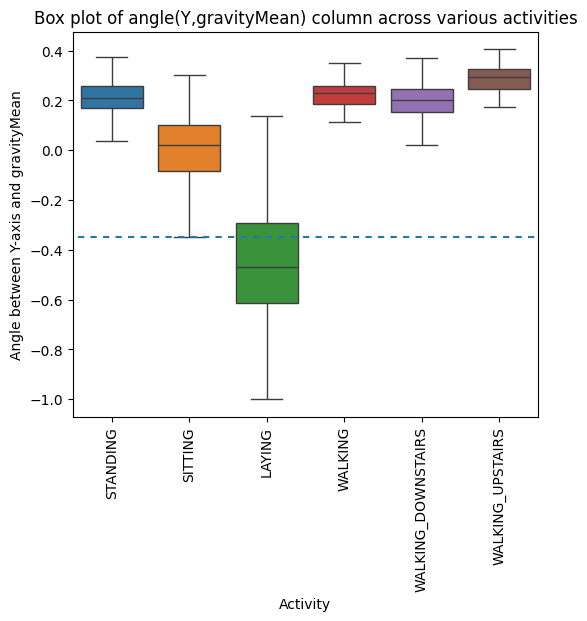

In [19]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Activity', y='angle(Y,gravityMean)',hue = 'Activity', data = train, showfliers=False)
plt.ylabel("Angle between Y-axis and gravityMean")
plt.title('Box plot of angle(Y,gravityMean) column across various activities')
plt.xticks(rotation = 90)
plt.axhline(y=-0.35, xmin=0.01, dashes=(3,3))
plt.show()

Similarly, using Angle between Y-axis and gravityMean we can seperate LAYING from other activities but again it leads to some misclassification error.


##### 4d. Visualization Data Using PCA (Principal Component Analysis)<a class = "anchor" id = "4d"></a>

Using PCA data can be visualized from a extremely high Dimension space to a low dimension space and still retains lots of actual Information.Given data has 561 unique features using PCA lets visualize it into a 2D space 

In [20]:
x_pca = train.drop(['subject','Activity'],axis = 1)
pca = PCA(n_components=2,random_state=42).fit_transform(x_pca)

In [21]:
pca

array([[-5.5202803 ,  0.29027752],
       [-5.53534954,  0.08253025],
       [-5.47498801, -0.28738705],
       ...,
       [ 5.85750527,  3.08184349],
       [ 5.42109482,  3.42643018],
       [ 5.49797027,  2.78992873]])

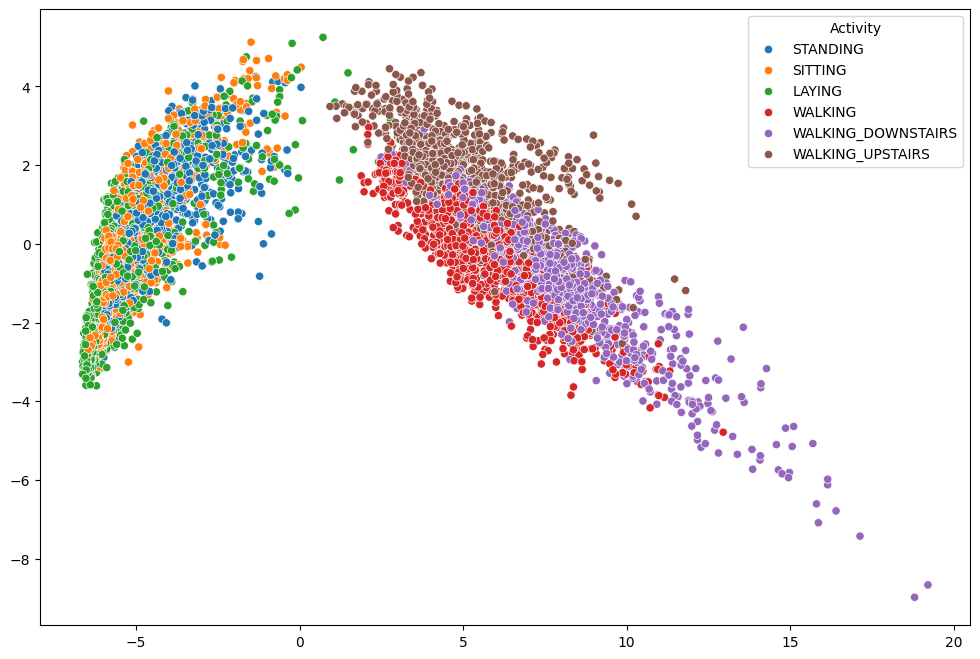

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = pca[:,0],y = pca[:,1],hue = train['Activity'])
plt.show()

Using the two new components obtained through PCA we can visualize and seperate all the six activities in a 2D space.

##### 4e. Visualizing data using t-SNE (t-distributed Stochastic Neighbor Embedding)<a class = "anchor" id = "4e"></a>

Using t-SNE data can be visualized from a extremely high Dimension space to a low dimension space and still retains lots of actual Information.Given data has 561 unique features using t-SNE lets visualize it into a 2D space 

In [23]:
x_tsne = train.drop(['subject','Activity'],axis = 1)
tsne = TSNE(n_components=2,random_state=42,n_iter = 1000).fit_transform(x_tsne) 

In [24]:
tsne

array([[ -5.8181005,  64.51442  ],
       [-26.348207 ,  17.05194  ],
       [-27.354973 ,  20.279522 ],
       ...,
       [ 23.547161 ,  59.746838 ],
       [ 23.537645 ,  59.49104  ],
       [ 24.039404 ,  58.73234  ]], dtype=float32)

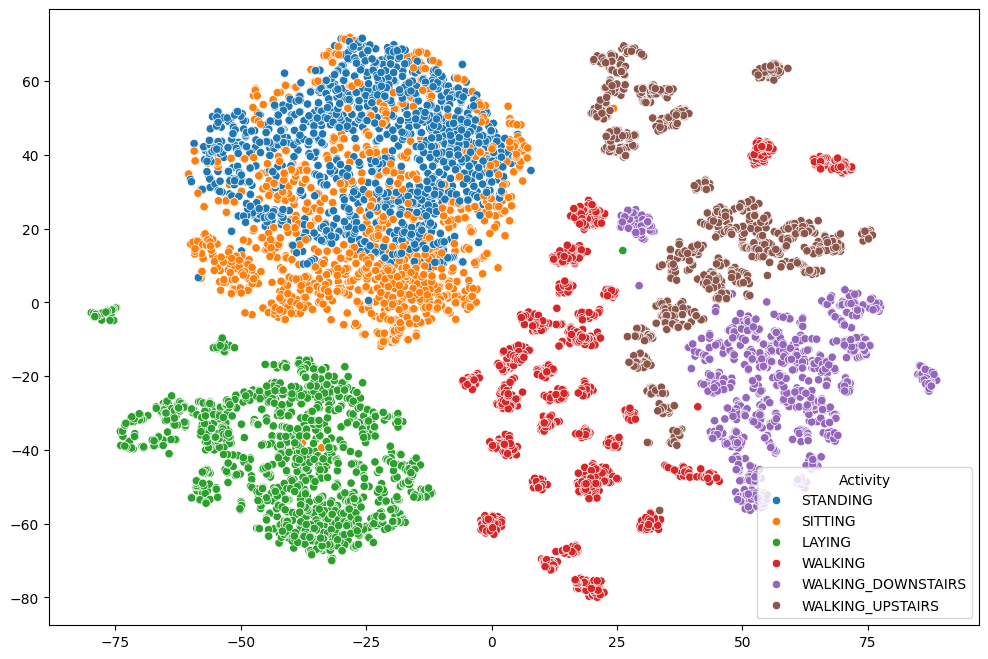

In [25]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = tsne[:,0],y = tsne[:,1],hue = train['Activity'])
plt.show()

# <font color='red'>5.Machine Learning Models</font><a class = "anchor" id = "ML"></a>

##### Getting training and testing data ready

In [26]:
X_train = train.drop(['subject','Activity'],axis = 1)
y_train = train['Activity']

X_test = test.drop(['subject','Activity'],axis = 1)
y_test = test['Activity']

In [27]:
print('Training Data Size : ',X_train.shape)
print('Testing Data Size : ',X_test.shape)

Training Data Size :  (7352, 561)
Testing Data Size :  (999, 561)


##### 5a.Logistic Regression model with Hyperparameter tuning and cross-validation<a class = "anchor" id = "5a"></a>

In [28]:
params = {'max_iter': [100,200,500]} 
lr_clf = LogisticRegression()
lr_clf_rs = RandomizedSearchCV(lr_clf,param_distributions = params,cv = 5,random_state = 42)

In [29]:
lr_clf_rs.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'max_iter': [100, 200, 500]},
                   random_state=42)

In [30]:
y_pred_lr = lr_clf_rs.predict(X_test)

In [31]:
lr_accuracy = accuracy_score(y_pred_lr,y_test)
print(f'Accuracy using Logistic Regression : {round(lr_accuracy*100,3)}%')

Accuracy using Logistic Regression : 95.596%


In [32]:
def plot_confusion_matrix(cm,labels):
    plt.figure(figsize=(6,6))
    df = pd.DataFrame(cm,columns = labels,index = labels)
    sns.heatmap(df,annot=True,cmap = 'Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.xticks(rotation = 90)
    plt.show()

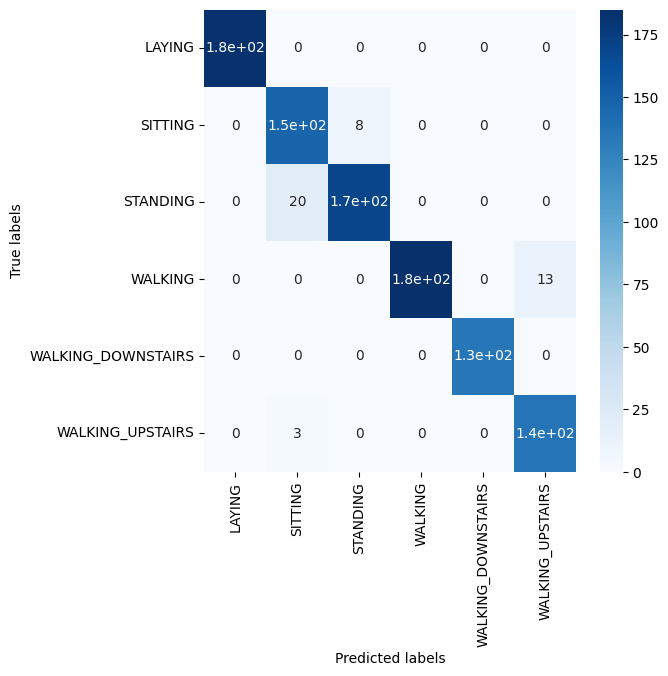

In [33]:
cm = confusion_matrix(y_pred_lr,y_test)
plot_confusion_matrix(cm,np.unique(y_pred_lr))

In [34]:
def get_randomizedCV_res(model):
    print('Best estimator : ',model.best_estimator_)
    print('Best parameters : ',model.best_params_)

In [35]:
get_randomizedCV_res(lr_clf_rs)

Best estimator :  LogisticRegression(max_iter=500)
Best parameters :  {'max_iter': 500}


##### 5b. Kernel SVM model with Hyperparameter tuning and cross-validation <a class = "anchor" id = "5b"></a>

In [36]:
params = {
    'kernel':['linear','rbf','poly','sigmoid'],
    'C':[50,100,300]
}
svm_rs = RandomizedSearchCV(SVC(),param_distributions=params,cv = 3,random_state=42)

In [37]:
svm_rs.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': [50, 100, 300],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=42)

In [38]:
y_pred_svm = svm_rs.predict(X_test)

In [39]:
print(f'Accuracy of SVC model { round(accuracy_score(y_pred_svm,y_test)*100,3) } % ')

Accuracy of SVC model 96.597 % 


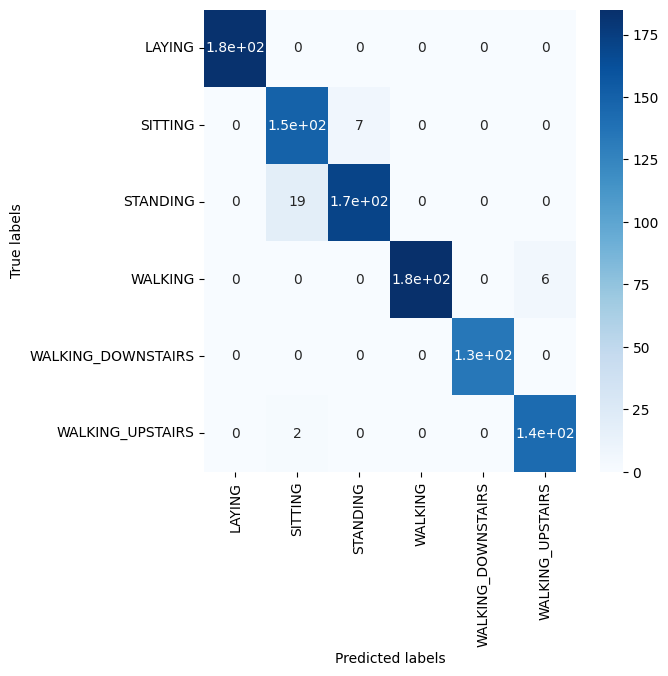

In [40]:
cm = confusion_matrix(y_pred_svm,y_test)
plot_confusion_matrix(cm,np.unique(y_pred_svm))

In [41]:
get_randomizedCV_res(svm_rs)

Best estimator :  SVC(C=50)
Best parameters :  {'kernel': 'rbf', 'C': 50}


##### 5c. Decision Tree Model with Hyperparameter tuning and cross-validation<a class = "anchor" id = "5c"></a>

In [42]:
parameters = {'max_depth' : np.arange(2,10,2)}
dt_clf = DecisionTreeClassifier()
dt_clf_rs = RandomizedSearchCV(dt_clf , param_distributions = parameters ,random_state = 42)

In [43]:
dt_clf_rs.fit(X_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': array([2, 4, 6, 8])},
                   random_state=42)

In [44]:
get_randomizedCV_res(dt_clf_rs)

Best estimator :  DecisionTreeClassifier(max_depth=np.int64(6))
Best parameters :  {'max_depth': np.int64(6)}


In [45]:
y_pred_dt = dt_clf_rs.predict(X_test)

In [46]:
print(f'Accuracy of DT model { round(accuracy_score(y_pred_dt,y_test)*100,3) } % ')

Accuracy of DT model 83.684 % 


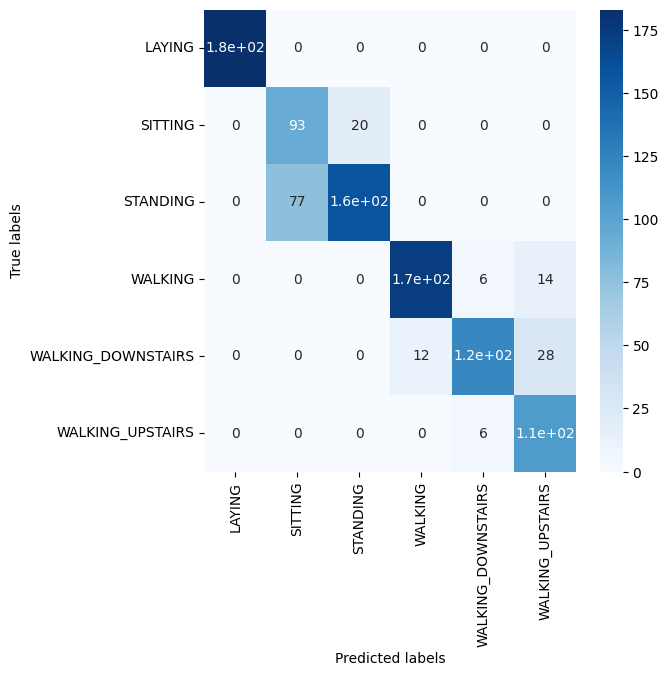

In [47]:
cm = confusion_matrix(y_pred_dt,y_test)
plot_confusion_matrix(cm,np.unique(y_pred_dt))

##### 5d. Random forest model with Hyperparameter tuning and cross validation<a class = "anchor" id = "5d"></a>

In [48]:
params = {
    'n_estimators':np.arange(20, 101, 10), 
    'max_depth': np.arange(2, 17, 2)
}
rf_clf_rs = RandomizedSearchCV(RandomForestClassifier(),param_distributions=params,random_state=42)

In [49]:
rf_clf_rs.fit(X_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16]),
                                        'n_estimators': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100])},
                   random_state=42)

In [50]:
y_pred_rf = rf_clf_rs.predict(X_test)

In [51]:
print(f'Accuracy of Random Forest Classifier model { round(accuracy_score(y_pred_rf,y_test)*100,3) } % ')

Accuracy of Random Forest Classifier model 90.49 % 


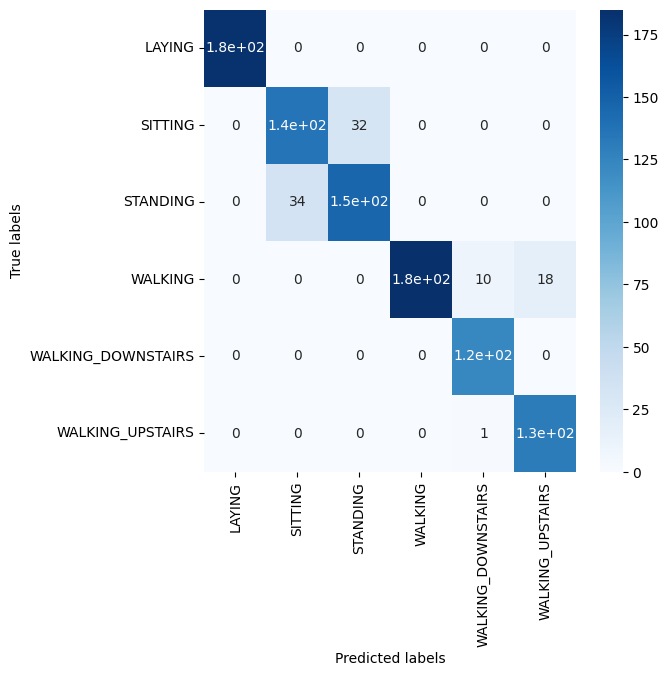

In [52]:
cm = confusion_matrix(y_pred_rf,y_test)
plot_confusion_matrix(cm,np.unique(y_pred_rf))

In [53]:
get_randomizedCV_res(rf_clf_rs)

Best estimator :  RandomForestClassifier(max_depth=np.int64(8), n_estimators=np.int64(90))
Best parameters :  {'n_estimators': np.int64(90), 'max_depth': np.int64(8)}
